In [368]:
import numpy as np
import matplotlib.pyplot as plt

In [369]:
uH = 1e-6
pF = 1e-12
uF = 1e-6
MHz = 1e6
kHz = 1e3

In [370]:
class TwoPort():
    def z(self, f): return 1 / self.y(f)
    def y(self, f): return 1 / self.z(f)

class Component(TwoPort):
    def __init__(self):
        self.val = None
        
class Res(Component):
    def __init__(self, ohms):
        self.val = ohms
    def z(self, f):
        return self.val
    
class Coil(Component):
    def __init__(self, henries):
        self.val = henries
    def z(self, f):
        return 2 * np.pi * f * self.val * 1j
    
class Cap(Component):
    def __init__(self, farads):
        self.val = farads
    def y(self, f):
        return 2 * np.pi * f * self.val * 1j

class Series(TwoPort):
    def __init__(self, *elems):
        self.elems = elems
    def z(self, f):
        return sum([port.z(f) for port in self.elems])
        
class Parallel(TwoPort):
    def __init__(self, *elems):
        self.elems = elems
    def y(self, f):
        return sum([port.y(f) for port in self.elems])

In [371]:
# This be the impedance, purely reactive.
Cap(0.1 * uF).z(10 * MHz)

-0.15915494309189535j

In [372]:
# And this be the admittance, purely susceptant.
z_c = Cap(0.1 * uF).y(10 * MHz)
print(z_c)

6.283185307179586j


In [373]:
C14 = C16 = Cap(180 * pF)
L7 = L9 = Coil(1 * uH)

C15 = Cap(680 * pF)
L8 = Coil(0.27 * uH)

def fr(L, C):
    return 1 / (2 * np.pi * np.sqrt(L.val * C.val))

f1 = fr(L7, C14)
f2 = fr(L8, C15)
f3 = fr(L9, C16)

for f in [f1, f2, f3]:
    print(f'{f / kHz :,.0f} kHz')

print(f'{L7.z(f1) :,.2f} ohms')
print(f'{L8.z(f2) :,.2f} ohms')
print(f'{L9.z(f1) :,.2f} ohms')

11,863 kHz
11,746 kHz
11,863 kHz
0.00+74.54j ohms
0.00+19.93j ohms
0.00+74.54j ohms


In [374]:
def atten(R_L):
    ckt = Parallel(
            Res(75), 
            Series(
                Res(120), 
                Parallel(
                    Res(75), 
                    Res(R_L)
                )
            )
    )
    return ckt

print( atten(50).z(0)  )


50.0


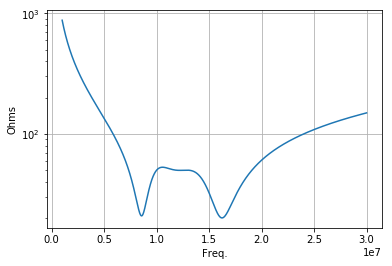

In [375]:
R_out = Res(50)

bpf = Series(
            C14,
            L7,
            Parallel(
                C15,
                L8,
                Series(
                    C16,
                    L9,
                    R_out
                )
            )
)

f = np.arange(1 * MHz, 30 * MHz, 10 * kHz)
z = bpf.z(f)
plt.semilogy(f, abs(z))
plt.xlabel('Freq.')
plt.ylabel('Ohms')
plt.grid(True)

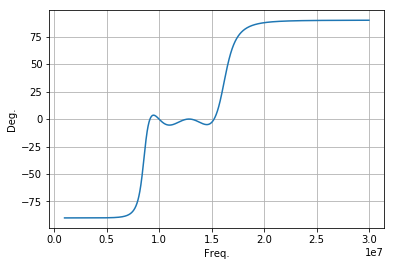

In [351]:
plt.plot(f, np.angle(z, deg=True))
plt.xlabel('Freq.')
plt.ylabel('Deg.')
plt.grid(True)

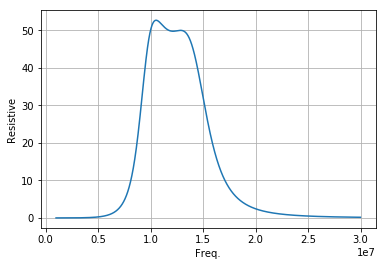

In [352]:
plt.plot(f, np.real(z))
plt.xlabel('Freq.')
plt.ylabel('Resistive')
plt.grid(True)

In [385]:
def capacitor(freq, ohms):
    "Capacitor that has ohms reactance at freq"
    return Cap(1 / (2 * np.pi * freq * ohms))

def inductor(freq, ohms):
    "Inductor that has ohms reactance at freq"
    return Coil(ohms / (2 * np.pi * freq))


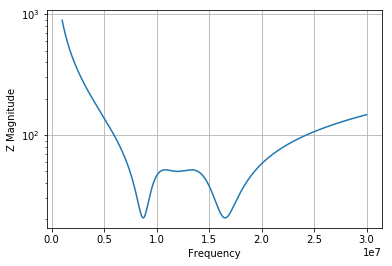

In [386]:
R_out = Res(50)

C_12_75 = capacitor(12 * MHz, ohms=75)
L_12_75 = inductor(12 * MHz, ohms=75)

C_12_20 = capacitor(12 * MHz, ohms=20)
L_12_20 = inductor(12 * MHz, ohms=20)

bpf2 = Series(
            C_12_75,
            L_12_75,
            Parallel(
                C_12_20,
                L_12_20,
                Series(
                    C_12_75,
                    L_12_75,
                    R_out
                )
            )
)

f = np.arange(1 * MHz, 30 * MHz, 10 * kHz)
z = bpf2.z(f)
plt.semilogy(f, abs(z))
plt.xlabel('Frequency')
plt.ylabel('Z Magnitude')
plt.grid(True)


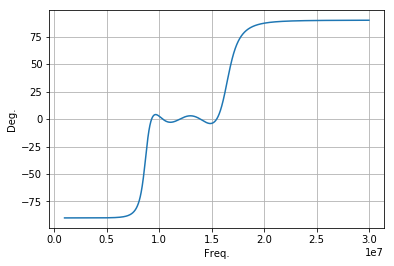

In [387]:
plt.plot(f, np.angle(z, deg=True))
plt.xlabel('Freq.')
plt.ylabel('Deg.')
plt.grid(True)

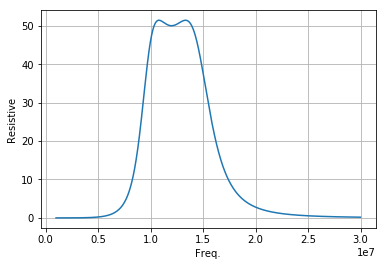

In [388]:
plt.plot(f, np.real(z))
plt.xlabel('Freq.')
plt.ylabel('Resistive')
plt.grid(True)